## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = pd.read_csv("dataset/insurance.csv")

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [5]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [6]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
df.duplicated().any()

np.False_

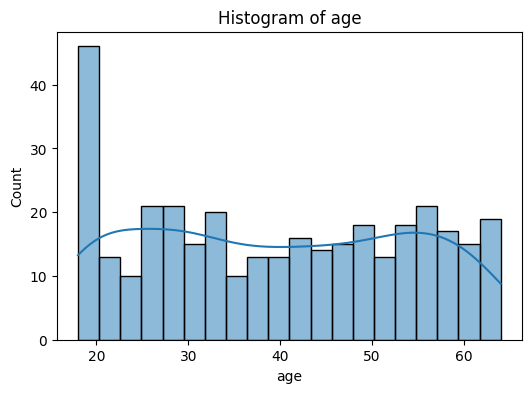

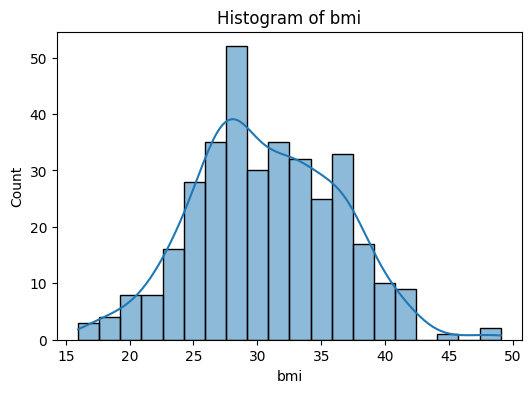

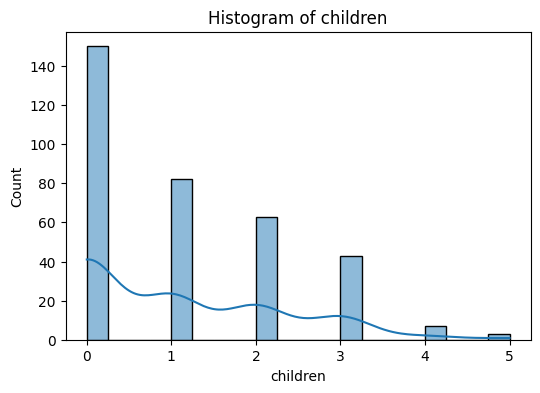

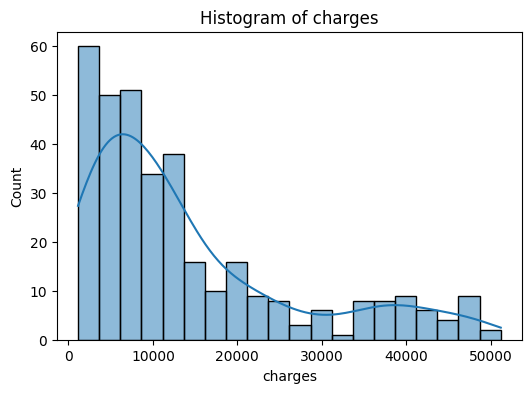

In [8]:
num_cols = ["age", "bmi", "children", "charges"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

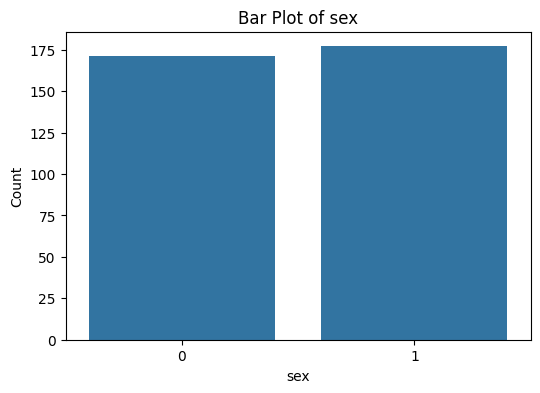

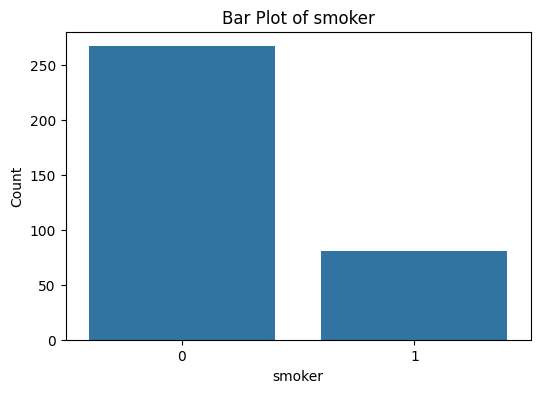

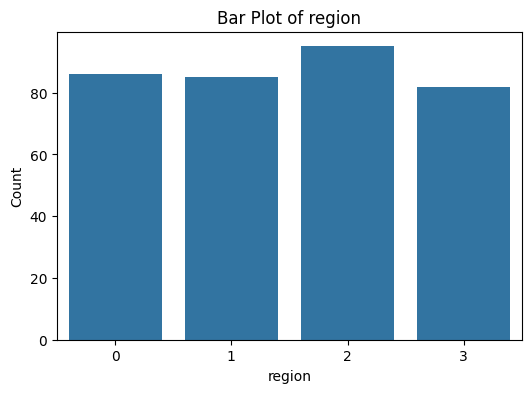

In [9]:
cat_cols = ["sex", "smoker", "region"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Preprocessing data

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
ohe = OneHotEncoder(sparse_output=False, drop="first")  
ohe_encoded = ohe.fit_transform(df[cat_cols])
ohe_encoded_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(cat_cols))
df_encoded = pd.concat([df.drop(columns=cat_cols), ohe_encoded_df], axis=1)

In [12]:
df_encoded.head(10)

,age,bmi,children,charges,sex_1,smoker_1,region_1,region_2,region_3
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
5,31,25.740,0,3756.62160,0.0,0.0,0.0,1.0,0.0
6,46,33.440,1,8240.58960,0.0,0.0,0.0,1.0,0.0
7,37,27.740,3,7281.50560,0.0,0.0,1.0,0.0,0.0
8,37,29.830,2,6406.41070,1.0,0.0,0.0,0.0,0.0
9,60,25.840,0,28923.13692,0.0,0.0,1.0,0.0,0.0


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [15]:
df_encoded.head(10)

,age,bmi,children,charges,sex_1,smoker_1,region_1,region_2,region_3
0,0.021739,0.360725,0.0,0.314596,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.538066,0.2,0.011757,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.514804,0.6,0.066173,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.203776,0.0,0.416470,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.390332,0.0,0.054534,1.0,0.0,1.0,0.0,0.0
5,0.282609,0.295468,0.0,0.052332,0.0,0.0,0.0,1.0,0.0
6,0.608696,0.528097,0.2,0.141908,0.0,0.0,0.0,1.0,0.0
7,0.413043,0.355891,0.6,0.122749,0.0,0.0,1.0,0.0,0.0
8,0.413043,0.419033,0.4,0.105267,1.0,0.0,0.0,0.0,0.0
9,0.913043,0.298489,0.0,0.555084,0.0,0.0,1.0,0.0,0.0


## Spliting dataset

In [16]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=["charges"])  
y = df_encoded["charges"]                 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (278, 8)
Testing set shape: (70, 8)


## Training 

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = regressor.predict(X_test)

## Evaluating

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
print("Slopes (coefficients):", regressor.coef_)
print("Intercept:", regressor.intercept_)


Slopes (coefficients): [ 0.2424307   0.25305692  0.06112838 -0.00156364  0.46670601 -0.00530505
 -0.03675642 -0.00863383]
Intercept: -0.08089438183142802


In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [22]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 0.01492999580353596
RMSE: 0.12218836198073842
R² Score: 0.7935546047668164


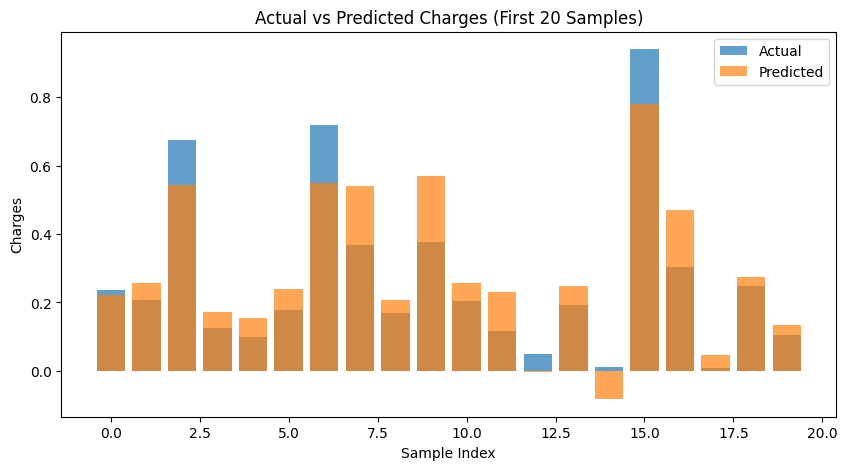

In [23]:
plt.figure(figsize=(10,5))
plt.bar(range(20), y_test.iloc[:20], label="Actual", alpha=0.7)
plt.bar(range(20), y_pred[:20], label="Predicted", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Charges")
plt.title("Actual vs Predicted Charges (First 20 Samples)")
plt.legend()
plt.show()

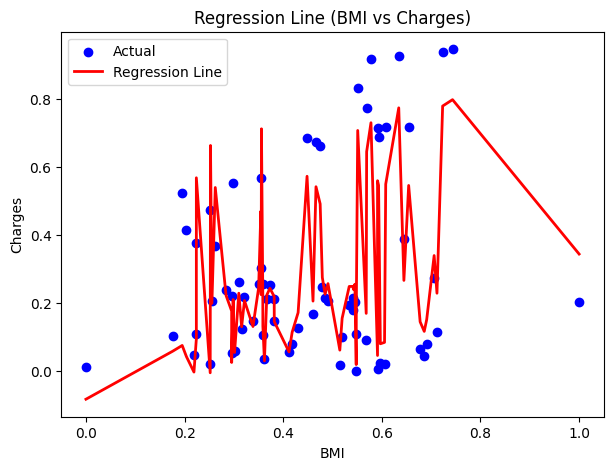

In [24]:
X_bmi_sorted = X_test["bmi"].values.reshape(-1, 1)
y_bmi_pred = regressor.predict(X_test)   
sorted_idx = np.argsort(X_bmi_sorted[:, 0])

plt.figure(figsize=(7,5))
plt.scatter(X_test["bmi"], y_test, color="blue", label="Actual")  
plt.plot(X_bmi_sorted[sorted_idx], y_bmi_pred[sorted_idx], color="red", linewidth=2, label="Regression Line")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Regression Line (BMI vs Charges)")
plt.legend()
plt.show()

In [25]:
X_bmi = df[["bmi"]].values
y = df["charges"].values
X_bmi = (X_bmi - X_bmi.mean()) / X_bmi.std()
m = 0   
c = 0   
L = 0.01   
epochs = 1000   
n = len(X_bmi)

In [26]:

X_bmi = df[["bmi"]].values
y = df["charges"].values
X_bmi = (X_bmi - X_bmi.mean()) / X_bmi.std()
y = (y - y.mean()) / y.std()

m, c = 0, 0
L = 0.0001   
epochs = 1000
n = len(X_bmi)

# Gradient Descent
for i in range(epochs):
    y_pred = m * X_bmi + c
    error = y_pred - y
    m -= L * (2/n) * np.sum(error * X_bmi)
    c -= L * (2/n) * np.sum(error)
    if i % 100 == 0:
        mse = np.mean(error**2)
        print(f"Epoch {i}: m={m:.4f}, c={c:.4f}, MSE={mse:.4f}")

print("Final slope (m):", m)
print("Final intercept (c):", c)


Epoch 0: m=0.0000, c=0.0000, MSE=1.0000
Epoch 100: m=0.0000, c=0.0000, MSE=1.0000
Epoch 200: m=0.0000, c=0.0000, MSE=1.0000
Epoch 300: m=0.0000, c=0.0000, MSE=1.0000
Epoch 400: m=0.0000, c=0.0000, MSE=1.0000
Epoch 500: m=0.0000, c=0.0000, MSE=1.0000
Epoch 600: m=0.0000, c=0.0000, MSE=1.0000
Epoch 700: m=0.0000, c=0.0000, MSE=1.0000
Epoch 800: m=0.0000, c=0.0000, MSE=1.0000
Epoch 900: m=0.0000, c=0.0000, MSE=1.0000
Final slope (m): 4.4153697301187393e-20
Final intercept (c): 2.4969094480398517e-16


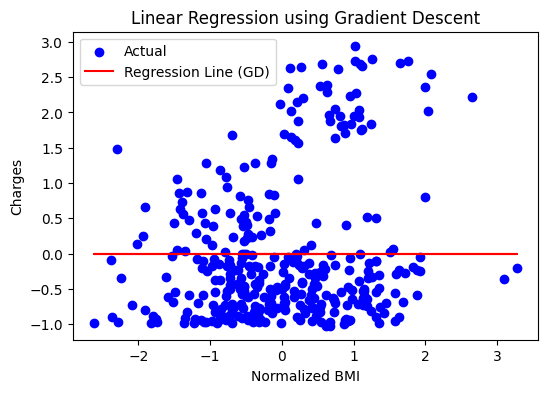

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(X_bmi, y, color="blue", label="Actual")
plt.plot(X_bmi, m*X_bmi + c, color="red", label="Regression Line (GD)")
plt.xlabel("Normalized BMI")
plt.ylabel("Charges")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()